In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [3]:
L = 77 # sm

In [4]:
np.sqrt(0.07**2 + 0.1**2)

np.float64(0.12206555615733704)

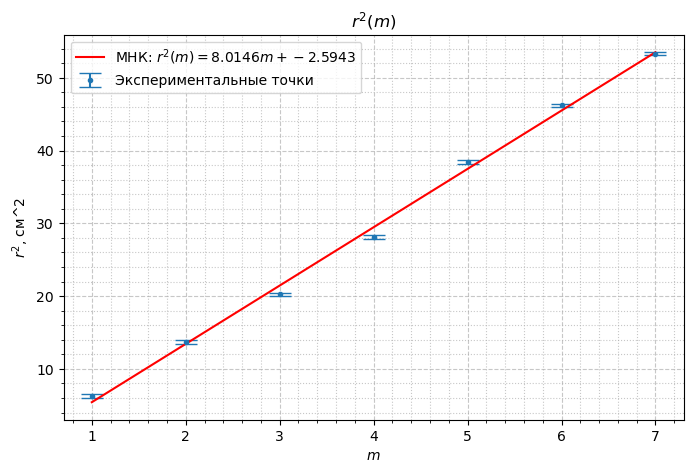

0.20017078167589267


In [5]:
m_values = np.array([1, 2, 3, 4, 5, 6, 7])
z_m = np.array([2.5, 3.7, 4.5, 5.3, 6.2, 6.8, 7.3])
z_m = [val ** 2 for val in z_m]
sigma_z = np.array([0.24] * (len(m_values) - 2) + [.22, .22])

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(m_values, z_m, yerr=sigma_z, fmt='.', capsize=8, label=r'Экспериментальные точки')

# Linear fit (least squares approximation)
coeffs = np.polyfit(m_values, z_m, 1)  # Fit a straight line (degree = 1)
coeffs = LeastSquares(m_values, z_m)
linear_fit = np.poly1d(coeffs[:2])  # Create a polynomial function

# Generate smooth values for the fitted line
m_fit = np.linspace(min(m_values), max(m_values), 100)
z_fit = linear_fit(m_fit)
plt.plot(m_fit, z_fit, 'r', label=f'МНК: $r^2 (m) = {coeffs[0]:.4f}m + {coeffs[1]:.4f}$')

# Labels and title
plt.xlabel(r'$m$')
plt.ylabel(r'$r^2$, см^2')
plt.title("$r^2(m)$")

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':', alpha=0.7, which='minor')
plt.legend()
plt.show()
print(coeffs[2])